In [1]:
cd C:\Users\idsan\OneDrive\문서\GitHub\pybrep\poisson_disk_sampling

C:\Users\idsan\OneDrive\문서\GitHub\pybrep\poisson_disk_sampling


In [2]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import time
from sklearn.metrics.pairwise import paired_distances

In [3]:
MIL = np.loadtxt('Interneurons.txt')

In [4]:
MIL = MIL/2.0

In [ ]:
# I should make a space window

In [5]:
min_x = min(MIL[:, 0])
max_x = max(MIL[:, 0])
min_z = min(MIL[:, 2])
max_z = max(MIL[:, 2])
min_y = min(MIL[:, 1])
max_y = max(MIL[:, 1])

In [ ]:
plt.plot(MIL[:, 0])

[0.75]


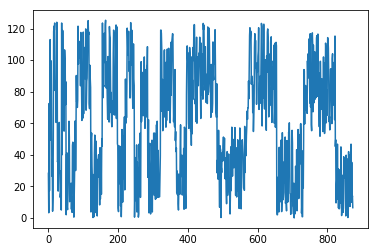

In [6]:

num = np.random.choice(MIL[:, 0], 1)
zero = np.zeros((874))+ num
temp = np.stack((zero, MIL[:, 1], MIL[:, 2]))
test = paired_distances(MIL, temp.T)
plt.plot(test)
print(num)

(array([19., 23., 12., 16., 18., 22., 26., 20.,  9.,  9., 10., 13., 16.,
        18., 14., 23., 10., 17., 15., 16.,  7., 16., 15., 23., 14., 22.,
         3.,  3.,  6.,  9.,  5.,  9., 15.,  7.,  6.,  8., 11.,  8.,  9.,
         6.,  6.,  6.,  6., 12.,  6.,  7.,  9.,  2., 10.,  3.,  6., 10.,
         9.,  5.,  5.,  7.,  9.,  3.,  4.,  5.,  5.,  8.,  6.,  5.,  3.,
         6.,  9.,  9.,  4., 12.,  9.,  5.,  3.,  6.,  7.,  2.,  6.,  3.,
         6.,  4.,  4.,  3.,  5.,  7.,  5.,  1.,  7.,  8.,  2., 11.,  2.,
         5.,  6.,  4.,  6.,  3.,  3.,  5.,  8.,  3.]),
 array([  0.  ,   1.94,   3.88,   5.82,   7.76,   9.7 ,  11.64,  13.58,
         15.52,  17.46,  19.4 ,  21.34,  23.28,  25.22,  27.16,  29.1 ,
         31.04,  32.98,  34.92,  36.86,  38.8 ,  40.74,  42.68,  44.62,
         46.56,  48.5 ,  50.44,  52.38,  54.32,  56.26,  58.2 ,  60.14,
         62.08,  64.02,  65.96,  67.9 ,  69.84,  71.78,  73.72,  75.66,
         77.6 ,  79.54,  81.48,  83.42,  85.36,  87.3 ,  89.24,  91.18,
  

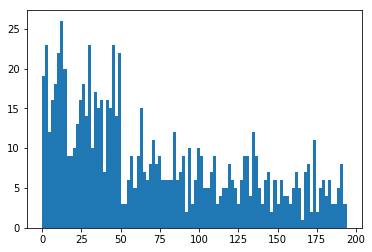

In [139]:
plt.hist(test, 100)

[-58.75]


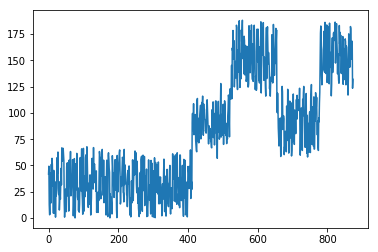

In [141]:
num1 = np.random.choice(MIL[:, 1], 1)
zero1 = np.zeros((874))+ num1
temp1 = np.stack((MIL[:, 0], zero1, MIL[:, 2]))
test1 = paired_distances(MIL, temp1.T)
plt.plot(test1)
print(num1)

[-59.5]


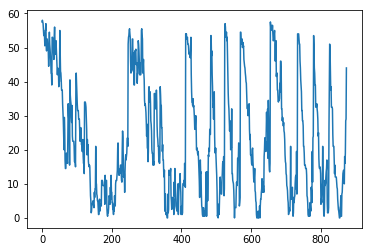

In [10]:
num2 = np.random.choice(MIL[:, 2], 1)
zero2 = np.zeros((874))+ num2
temp2 = np.stack((MIL[:, 0], MIL[:, 1], zero2))
test2 = paired_distances(MIL, temp2.T)
plt.plot(test2)
print(num2)

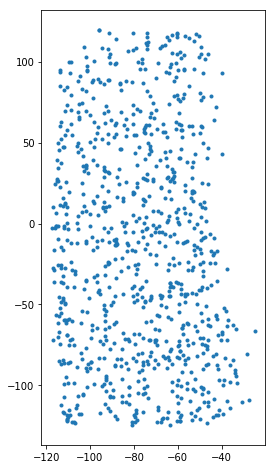

In [65]:
# plt.hist(, 150)
from scipy.spatial.distance import pdist
dist = pdist(MIL[:,2][:,np.newaxis])
# _ = hist(MIL[:,2], np.arange(MIL[:,2].min(), MIL[:,2].max(), 1))
_, ax = plt.subplots(figsize=(4,8))
ax.plot(MIL[:,2], MIL[:,0],'.')

C:\Users\idsan\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


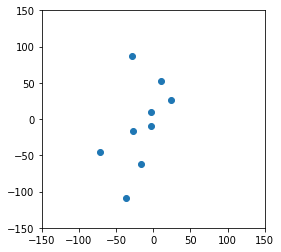

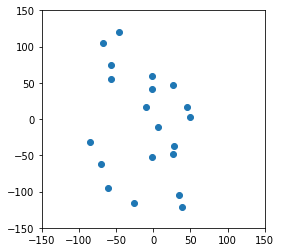

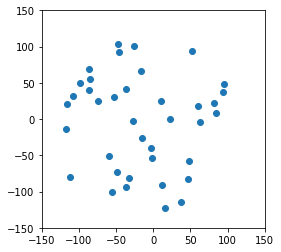

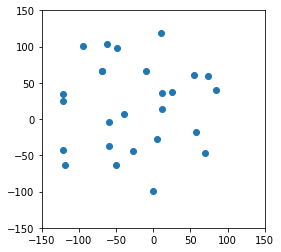

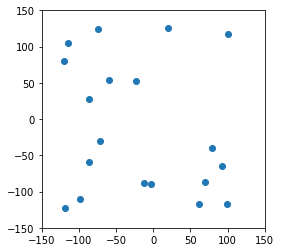

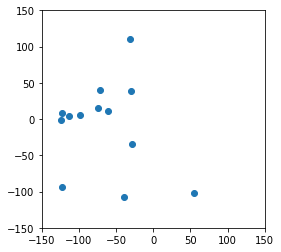

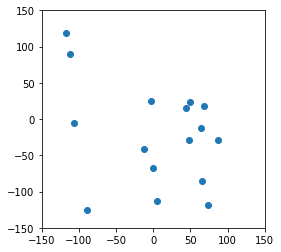

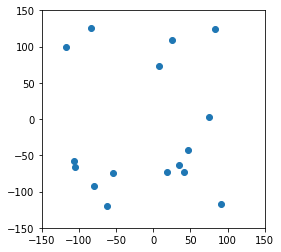

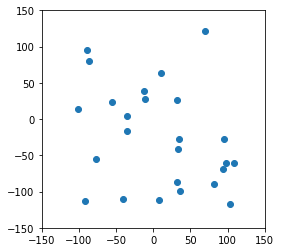

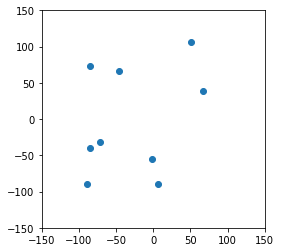

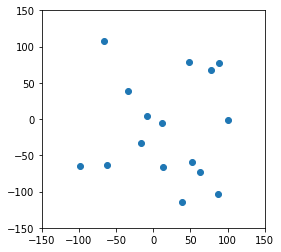

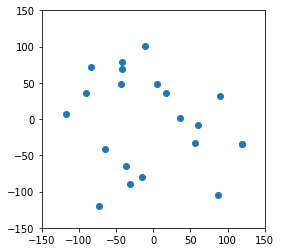

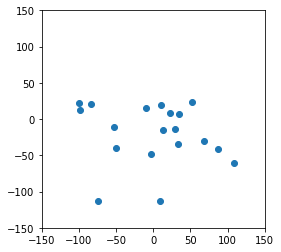

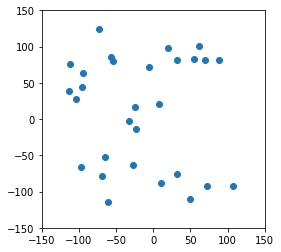

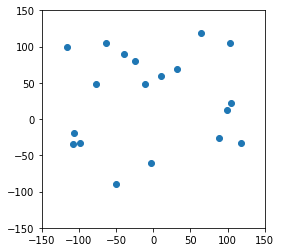

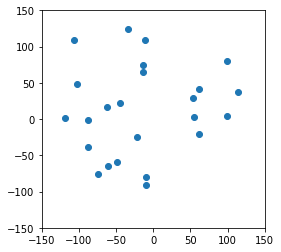

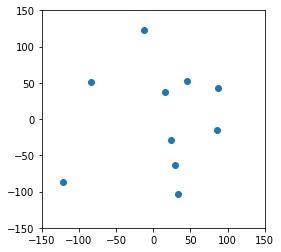

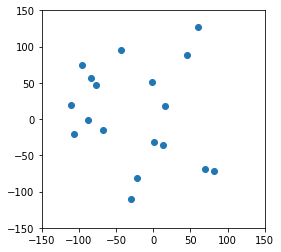

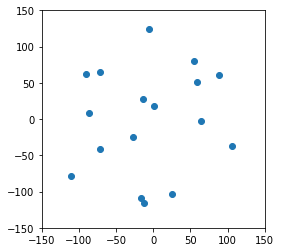

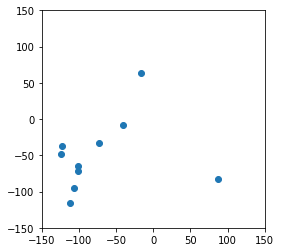

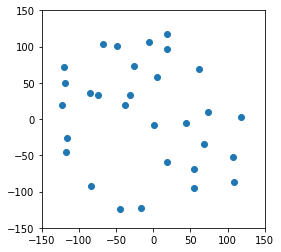

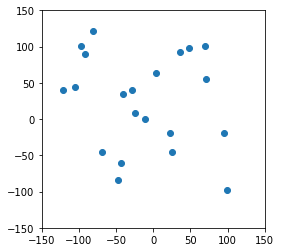

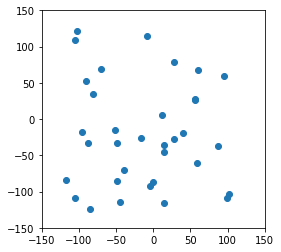

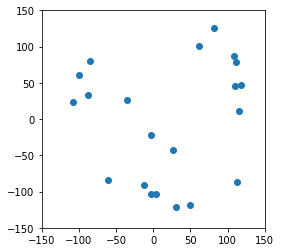

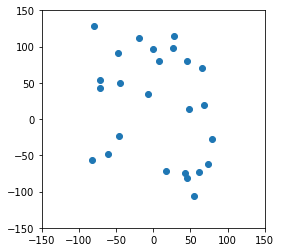

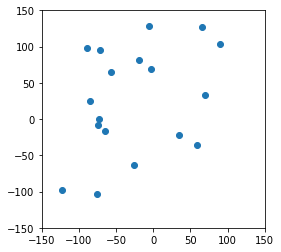

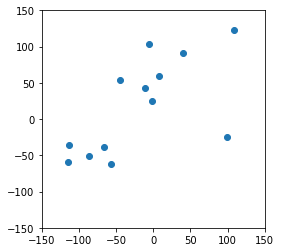

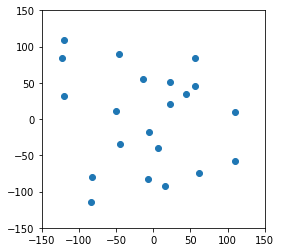

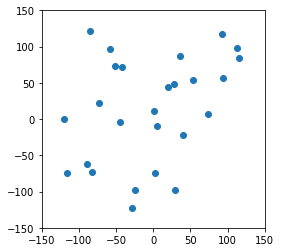

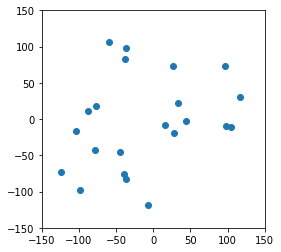

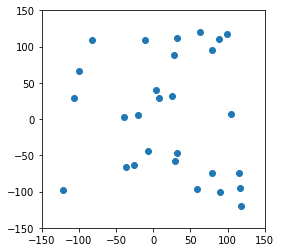

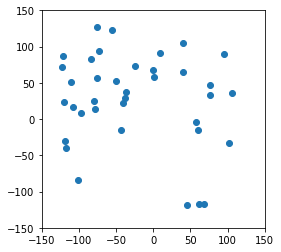

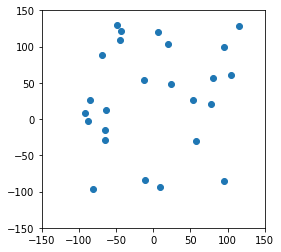

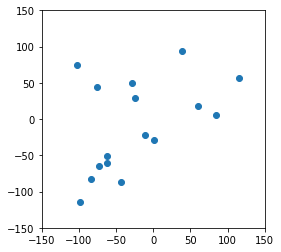

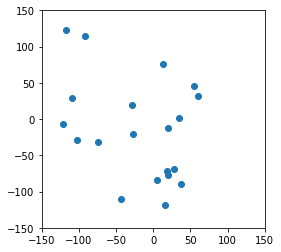

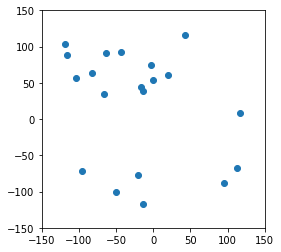

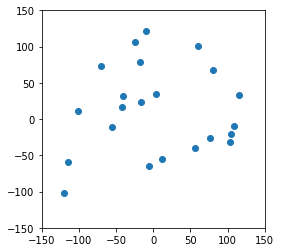

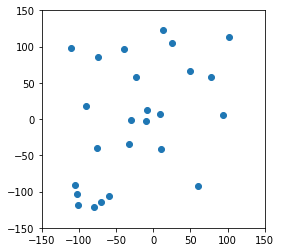

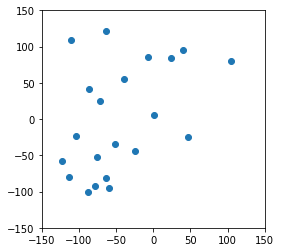

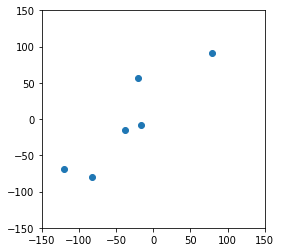

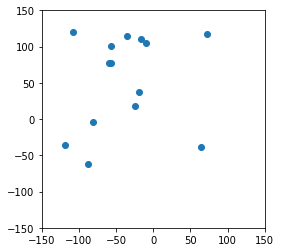

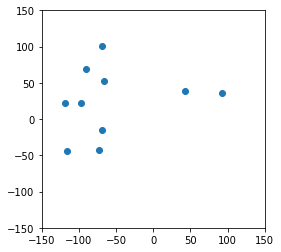

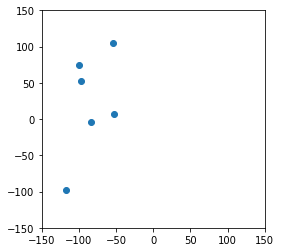

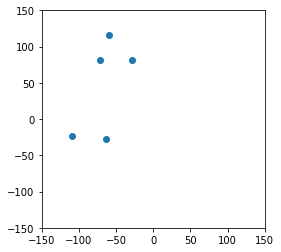

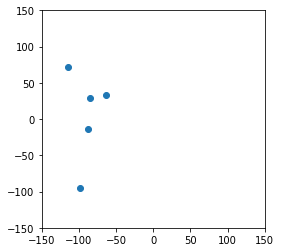

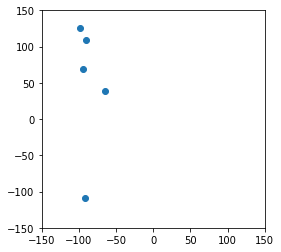

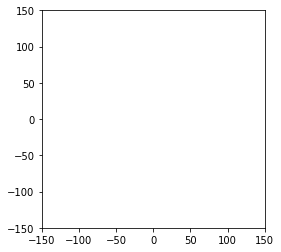

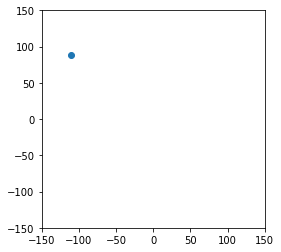

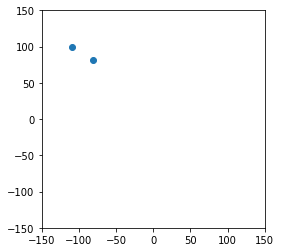

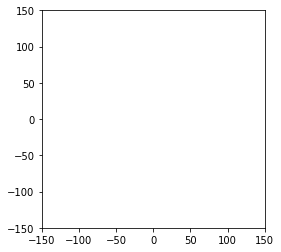

In [78]:
plt.close('all')
nslice=50
dx = (MIL[:,2].max()-MIL[:,2].min())/nslice
for i in range(nslice):
    in_slice = np.logical_and(MIL[:,2].min()+dx*i<=MIL[:,2], MIL[:,2]<MIL[:,2].min()+dx*(i+1))
    _, ax = plt.subplots(figsize=(4,4))
    ax.plot(MIL[in_slice,0], MIL[in_slice,1],'o')
    ax.set(xlim=[-150,150], ylim=[-150, 150])

(0, 0.1)

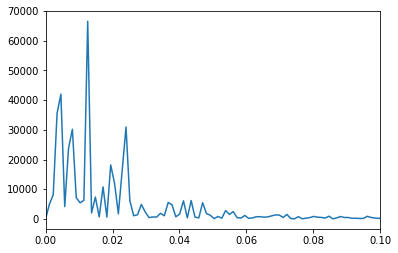

In [57]:
import scipy.signal as signal
fz, Pzz = signal.periodogram(MIL[:,2]-MIL[:,2].mean())
plt.plot(fz, Pzz)
plt.xlim([0, 0.1])

In [182]:
mean

[]

C:\Users\idsan\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ValueError: zero-size array to reduction operation maximum which has no identity

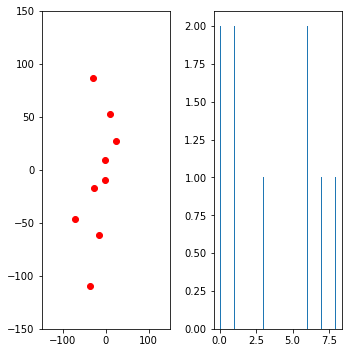

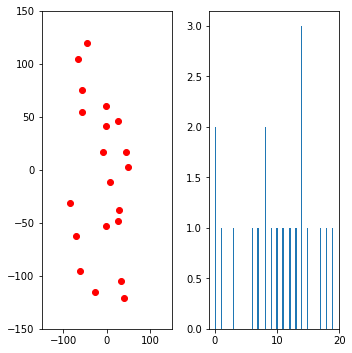

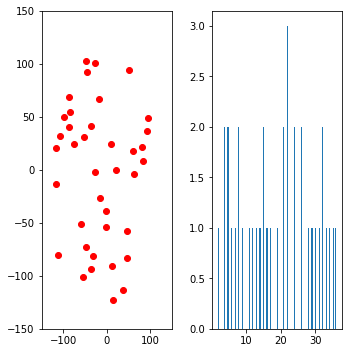

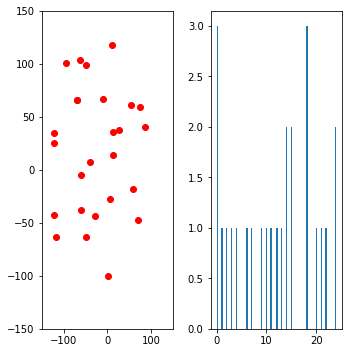

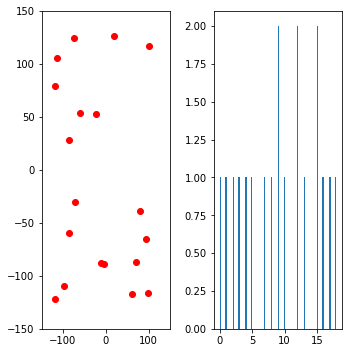

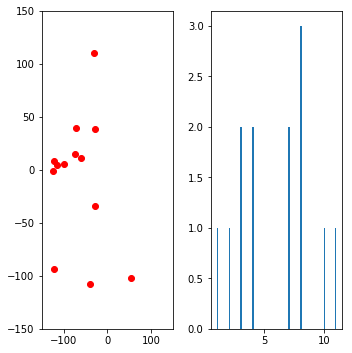

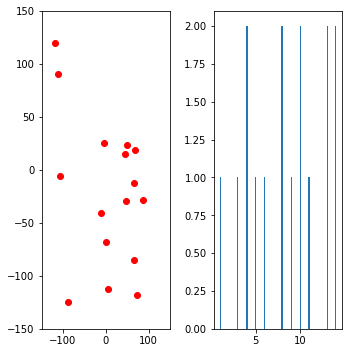

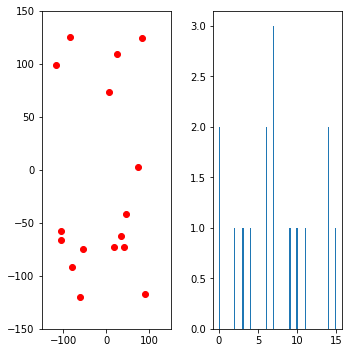

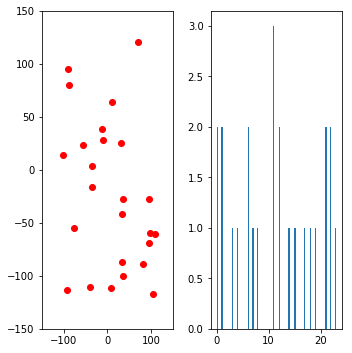

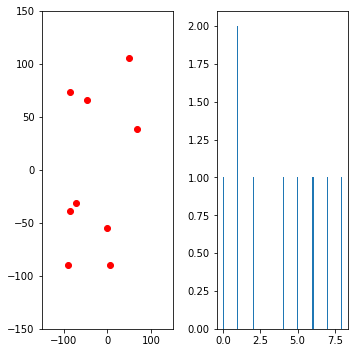

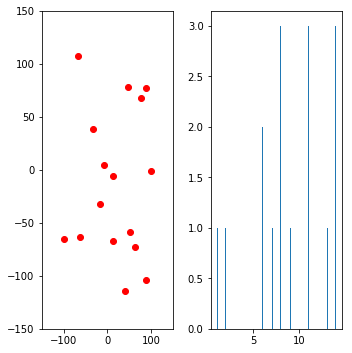

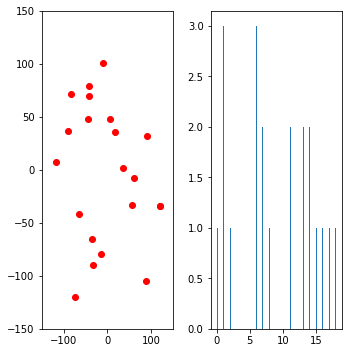

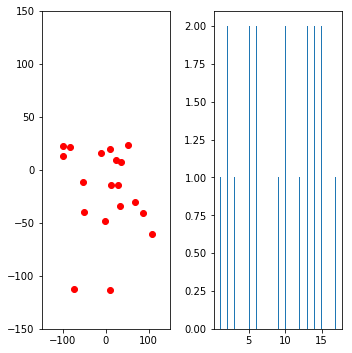

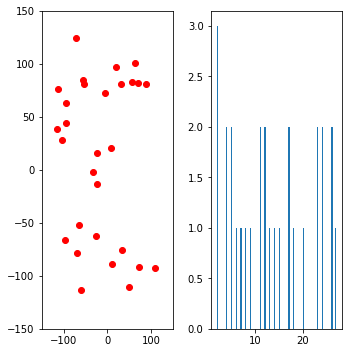

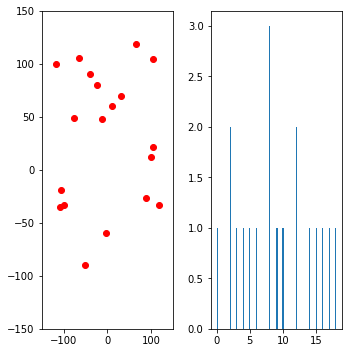

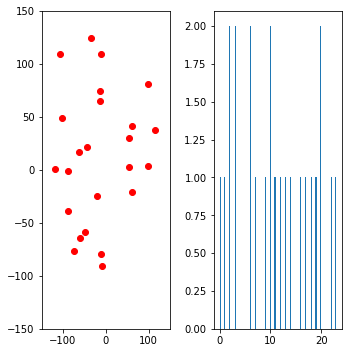

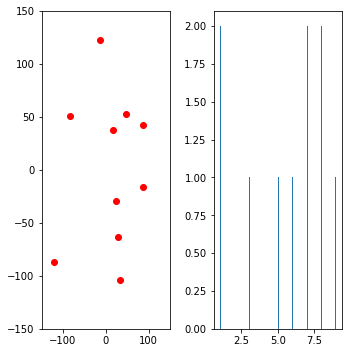

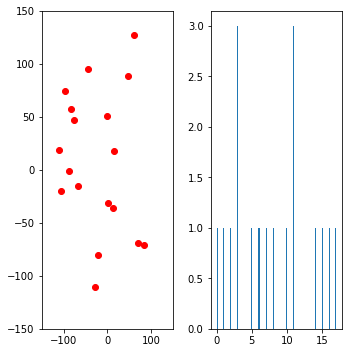

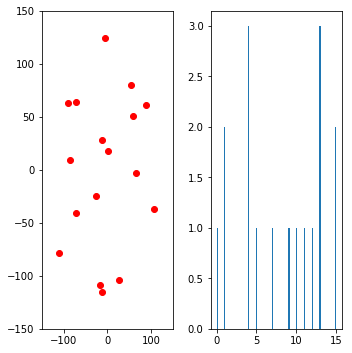

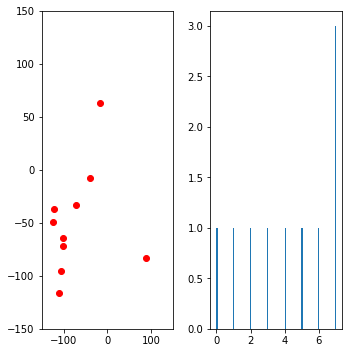

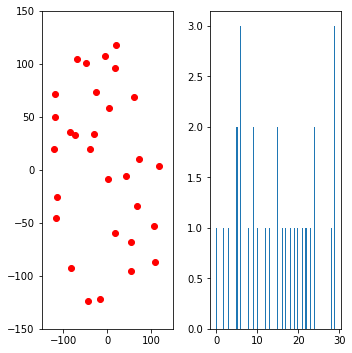

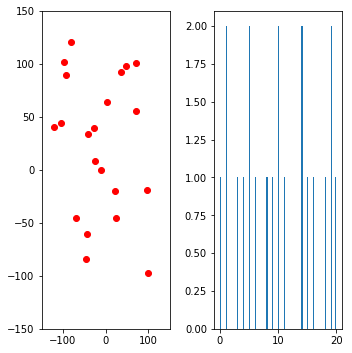

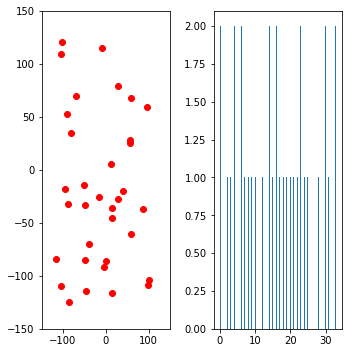

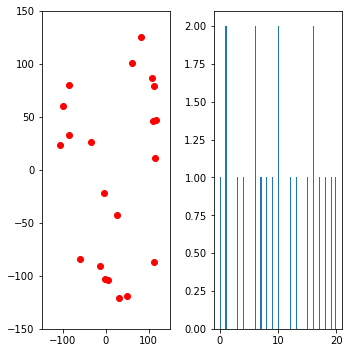

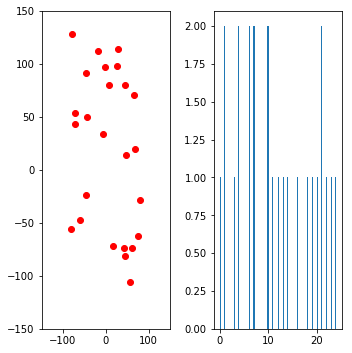

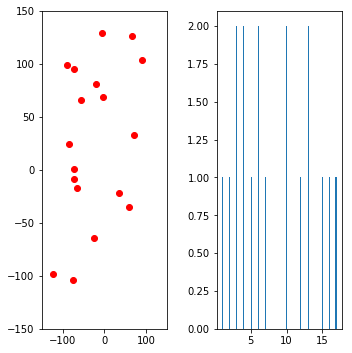

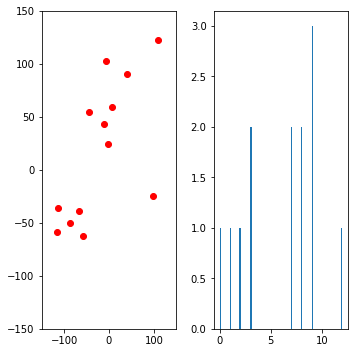

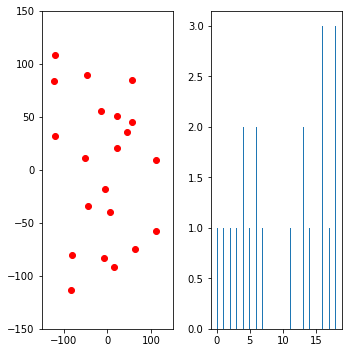

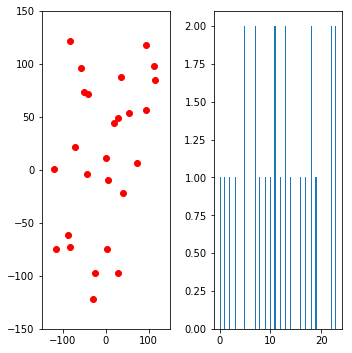

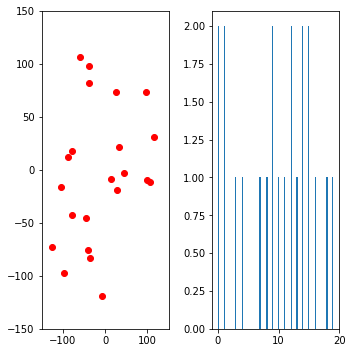

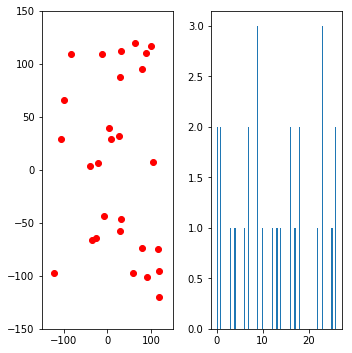

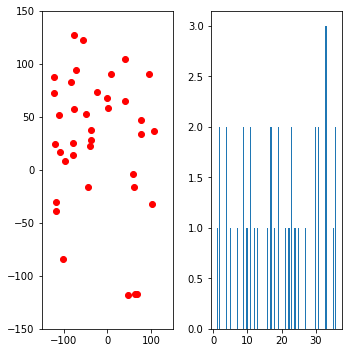

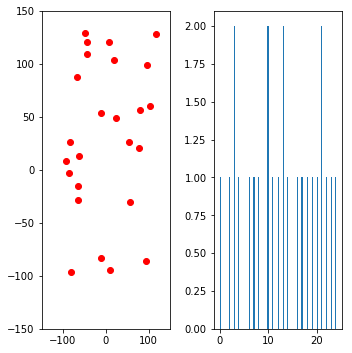

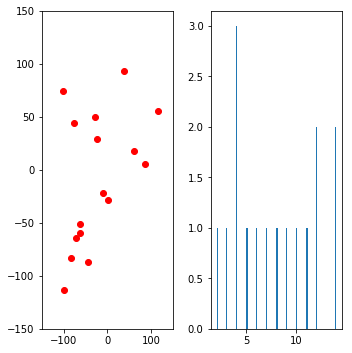

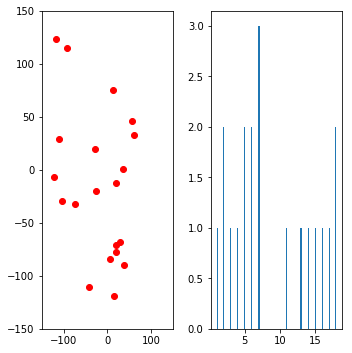

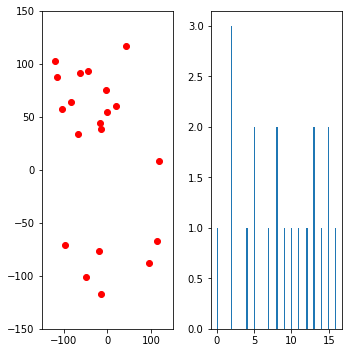

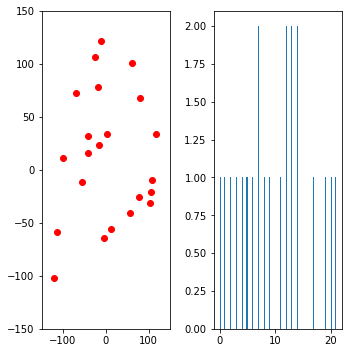

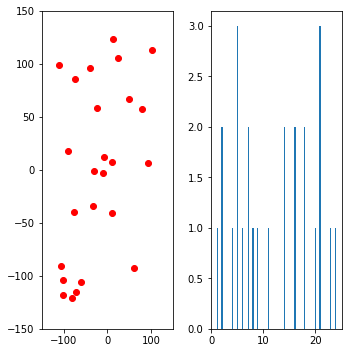

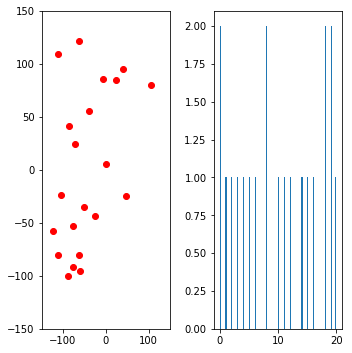

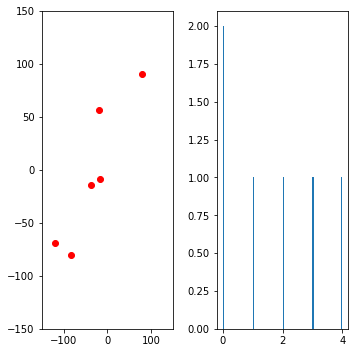

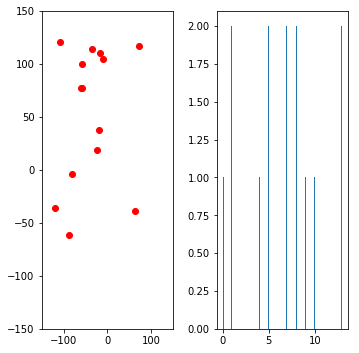

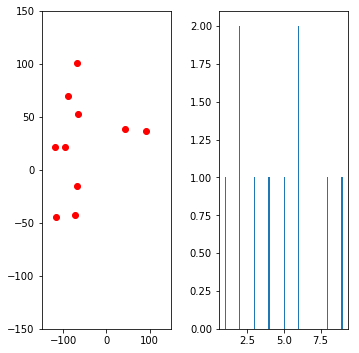

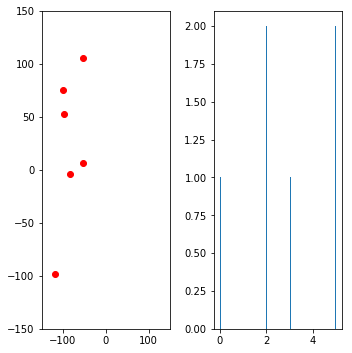

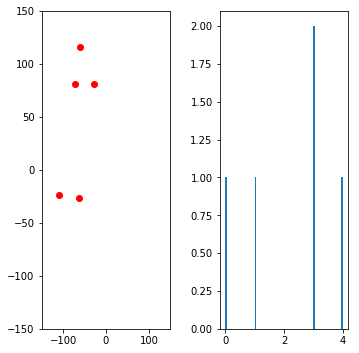

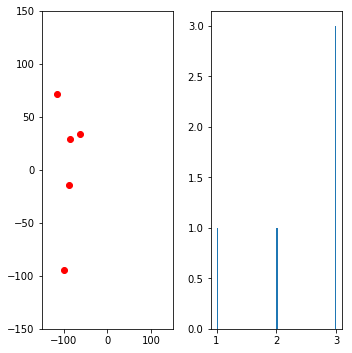

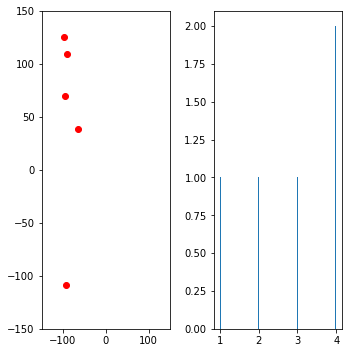

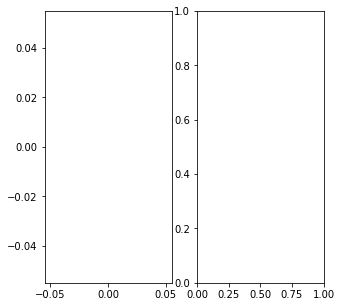

In [184]:
from scipy import spatial
rs = np.arange(0.1, 30, 0.1)
plt.close('all')
nslice=50
dx = (MIL[:,2].max()-MIL[:,2].min())/nslice
for i in range(nslice):
    mean=[]
    var=[]
    in_slice = np.logical_and(MIL[:,2].min()+dx*i<=MIL[:,2], MIL[:,2]<MIL[:,2].min()+dx*(i+1))
    _, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,5))
    ax[0].plot(MIL[in_slice,0], MIL[in_slice,1], 'o', color='red')
#     for r in rs:
#         tree = spatial.cKDTree(MIL).query_ball_point(MIL[in_slice], r)
#         mean.append(np.mean(len(tree)))
#         var.append(np.var(len(tree)))
    q, distance =spatial.cKDTree(MIL[in_slice]).query(MIL[in_slice], k=2)
    distance = distance[:, 1]
    ax[1].hist(distance, 100)
    plt.tight_layout()
    ax[0].set(xlim=[-150,150], ylim=[-150, 150])


In [191]:
96596.5*700*1500*200*1e-9

20285.265000000003

In [193]:
800**3/6

85333333.33333333

In [168]:
mean = []
var=[]
for i in range(0, len(temp)):
    mean.append(np.mean(temp[i]))
    var.append(np.var(temp[i]))

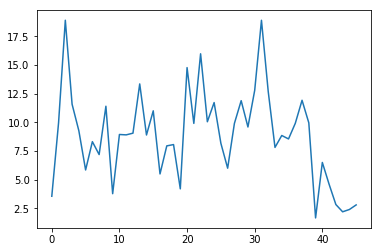

ValueError: zero-size array to reduction operation maximum which has no identity

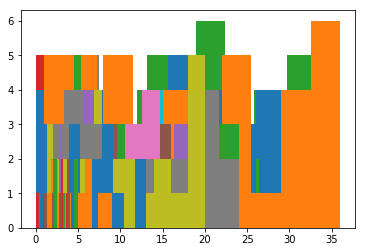

In [113]:
for i in range(nslice):
    in_slice = np.logical_and(MIL[:,2].min()+dx*i<=MIL[:,2], MIL[:,2]<MIL[:,2].min()+dx*(i+1))
    _, distance =spatial.cKDTree(MIL[in_slice]).query(MIL[in_slice], k=2)
    distance = distance[:, 1]
    plt.hist(distance)

In [115]:
_, a = spatial.cKDTree(MIL).query(MIL, k=2)
a

array([[  0, 484],
       [  1,  36],
       [  2,  31],
       ...,
       [871, 835],
       [872, 542],
       [873, 686]])

In [91]:
from matplotlib.patches import Circle

list

In [ ]:
plt.plot(MIL[:, 2])

[-5.1537211]


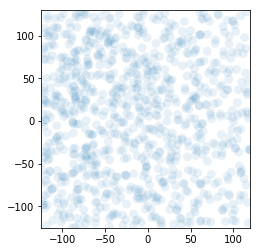

In [82]:
L = 10
p = 0.5
numnum = np.random.normal(0, 12, size=1)
ells = [Circle((MIL[i, 0], MIL[i, 1]), numnum) for i in range(0, len(MIL))]

print(numnum)

a = plt.subplot(111, aspect='equal')
# a, ax = plt.subplots(nrows=1, ncols=20, sharey='row')

# plt.scatter(MIL[:, 2], MIL[:, 1], color='red')
for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.1)
    a.add_artist(e)
    a.set_xlim(min_x, max_x)
    a.set_ylim(min_y, max_y)
# for i in range(0, int(np.ceil((max_z-min_z)/L))):
# #     ells.set_clip_box(a.bbox)
# #     ells.set_alpha(0.1)
# #     ax[i].add_artist(test)
#     ax[0, i].scatter(MIL[:, 2], MIL[:, 1], color='red', s=10)
#     ax[i].set_xlim(L*(i-min_z-p), L*((i-min_z+1)-p))
#     plt.subplots_adjust
#     for e in ells:
#         e.set_clip_box(a.bbox)
#         e.set_alpha(0.1)
#         a[i, 0].add_artist(e)

# plt.show()

In [228]:
cd C:\Users\idsan\OneDrive\문서\GitHub\pybrep\poisson_disk_sampling\python

C:\Users\idsan\OneDrive\문서\GitHub\pybrep\poisson_disk_sampling\python


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance

image = Image.open('flower.jpg')
print(type(image))
image_data = np.asarray(image)
print(type(image_data))
img = a
# cv2.imshow('GoldenGate',img)

color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([image_data],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

while True:
    k = cv2.waitKey(0) & 0xFF     
    if k == 27: break             # ESC key to exit 
cv2.destroyAllWindows()

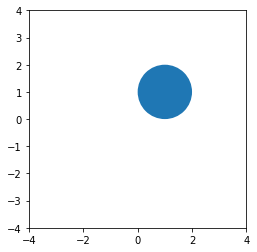

In [100]:
e1 = Circle((1, 1), 1)
a1 = plt.subplot(111, aspect = 'equal')

e1.set_clip_box(a1.bbox)
a1.add_artist(e1)
a1.set_xlim(-4, 4)
a1.set_ylim(-4, 4)


plt.show()

In [63]:
ells

In [40]:
# for i in range(0, len(MIL)):
#     plt.Circle((MIL[i, 0], MIL[i, 1]), 1, color='b', fill=False)
circle2 = plt.Circle((MIL[5, 0], MIL[5, 1]), 1, color='b', fill=True)
# ax = plt.gca()
# ax.cla() # clear things for fresh plot
for i in range(0, len(MIL)):
    circ = plt.Circle(MIL[i, 0], MIL[i, 1])
    ax.add_artist(circ)
# change default range so that new circles will work
#ax.set_xlim((min_x, min_x+10))
#ax.set_ylim((min_y, min_y+10))

# ax.add_artist(circle2)
plt.show()

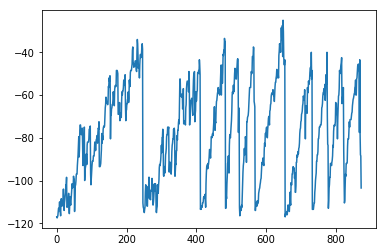

In [50]:
plt.plot(MIL[:, 2])

In [37]:
# Make some example data
x = np.random.rand(5)*img.shape[1]
y = np.random.rand(5)*img.shape[0]

# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# Now, loop through coord arrays, and create a circle at each x,y pair
for xx,yy in zip(x,y):
    circ = Circle((xx,yy),50)
    ax.add_patch(circ)

# Show the image
plt.show()

NameError: name 'img' is not defined

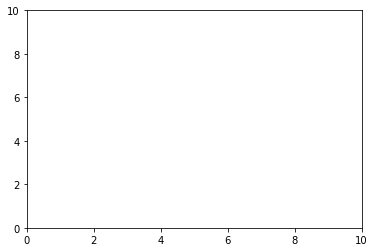

In [35]:
# now make a circle with no fill, which is good for hi-lighting key results
circle2 = plt.Circle((MIL[3, 0], MIL[3, 1]), 0.5, color='b', fill=True)

ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range so that new circles will work
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
# some data
# ax.plot(range(11), 'o', color='black')
# key data point that we are encircling
#ax.plot((5), (5), 'o', color='y')

# ax.add_artist(circle1)
ax.add_artist(circle2)
#ax.add_artist(circle3)
# fig.savefig('plotcircles2.png')

In [564]:
plt.Circle(MIL[:, 0], MIL[:, 1])

In [73]:
a = paired_distances(tempxy, tempxz)

In [75]:
b = paired_distances(tempxy, tempyz)

In [76]:
c = paired_distances(tempxz, tempyz)

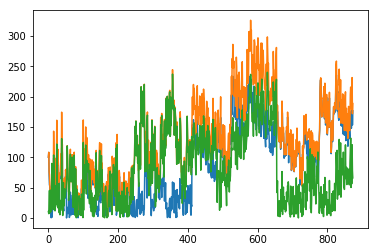

In [126]:
plt.plot(a)
plt.plot(b)
plt.plot(c)

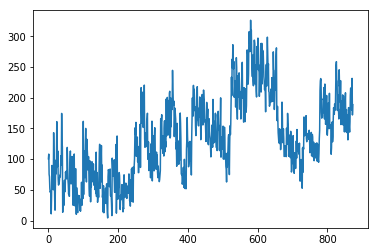

In [114]:
plt.plot(b)

In [59]:
tempxy = np.stack((MIL[:, 0], MIL[:, 1]), axis=1)

In [62]:
tempxz = np.stack((MIL[:, 0], MIL[:, 2]), axis=1)

In [63]:
tempyz = np.stack((MIL[:, 1], MIL[:, 2]), axis=1)

(array([176., 271., 236., 134.,  39.,  10.,   4.,   2.,   0.,   2.]),
 array([ 0.        ,  1.14127122,  2.28254244,  3.42381366,  4.56508488,
         5.70635611,  6.84762733,  7.98889855,  9.13016977, 10.27144099,
        11.41271221]),
 <a list of 10 Patch objects>)

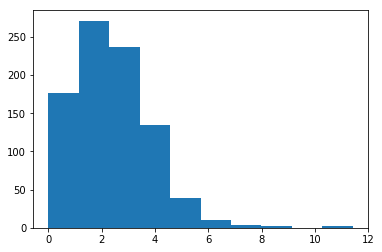

In [68]:
Dist,_ = spatial.cKDTree(tempyz).query(tempyz, k=2)
Dist = Dist[:, 1]
plt.hist(Dist)

In [69]:
plt.plot()

array([ 5.70087713,  2.82842712,  3.20156212,  2.06155281,  2.06155281,
        1.11803399,  2.91547595,  7.        ,  3.36340601,  2.82842712,
        2.30488611,  4.9244289 ,  1.67705098,  1.5       ,  1.        ,
        4.03112887,  2.01556444,  1.        ,  4.27200187,  3.40036763,
        3.60555128,  4.85412196,  2.12132034,  3.09232922,  4.27200187,
        4.27200187,  4.80234318,  1.95256242,  1.60078106,  1.11803399,
        2.6925824 ,  2.5       ,  2.01556444,  4.12310563,  2.23606798,
        2.06155281,  2.82842712,  2.06155281,  2.75      ,  3.09232922,
        1.80277564,  3.53553391,  4.24264069,  1.60078106,  1.82002747,
        1.58113883,  2.30488611,  3.13249102,  1.        ,  1.60078106,
        3.20156212,  2.6925824 ,  3.36340601,  1.11803399,  1.11803399,
        0.25      ,  4.06970515,  3.        ,  1.        ,  1.03077641,
        2.23606798,  2.6925824 ,  3.35410197,  2.23606798,  3.5       ,
        3.01039864,  2.6925824 ,  2.6925824 ,  0.70710678,  1.82

In [46]:
874/np.abs(min_z-max_z)*np.abs(min_y-max_y)*np.abs(min_x-max_x)*1e-9

7.758896365422398e-05

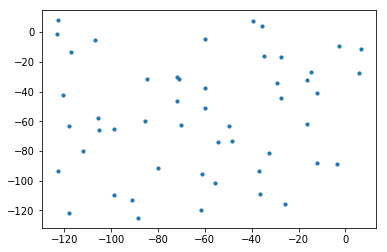

In [32]:
plt.scatter(MIL[:, 0][0:50], MIL[:, 1][0:50], s=10)

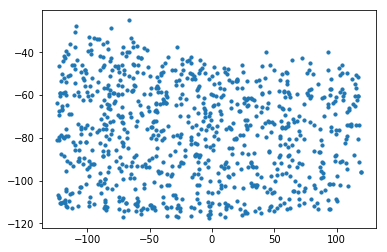

In [11]:
plt.scatter(MIL[:, 0], MIL[:, 2], s=10)

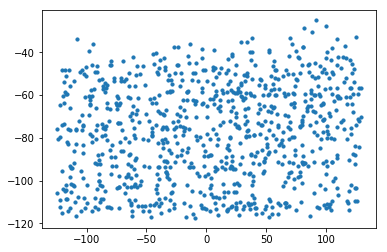

In [12]:
plt.scatter(MIL[:, 1], MIL[:, 2], s=10)

In [216]:
import scipy.cluster.hierarchy as cl

In [261]:
from sklearn.cluster import AgglomerativeClustering

In [262]:
Z = cl.linkage(MIL, method='average')

NameError: name 'points' is not defined

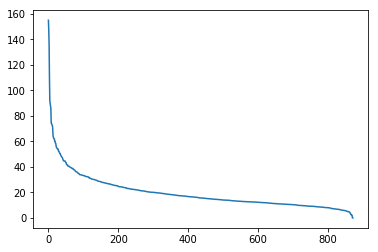

In [252]:
plt.plot(Z[::-1,2])

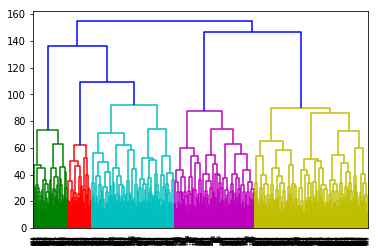

In [230]:
_ = cl.dendrogram(Z)

In [231]:
lb = cl.fcluster(Z, 50, criterion='maxclust')

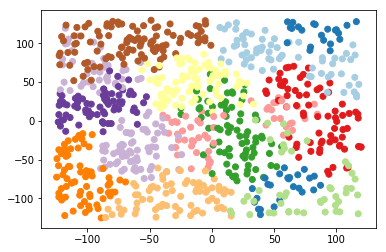

In [232]:
plt.scatter(MIL[:,0], MIL[:,1], c=lb, cmap='Paired')

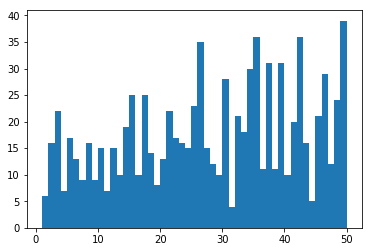

In [237]:
n, bins, _ = plt.hist(lb, np.arange(50)+1)

In [240]:
n.mean(), n.std()

(17.836734693877553, 8.867153188273367)

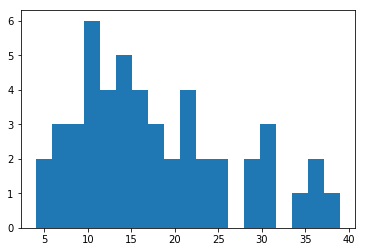

In [249]:
_ = plt.hist(n,19)

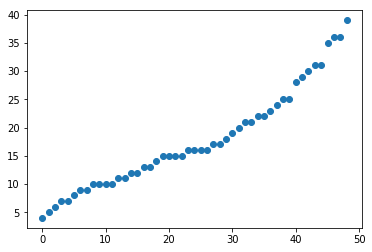

In [247]:
plt.plot(np.sort(n),'o')

In [270]:
from scipy.stats import boltzmann as bol

In [ ]:
k, 
lambda_= 1 
N
loc=0
bol.pmf(k, lambda_, N, loc=0)

(10, 9.594411813665314)


C:\Users\idsan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


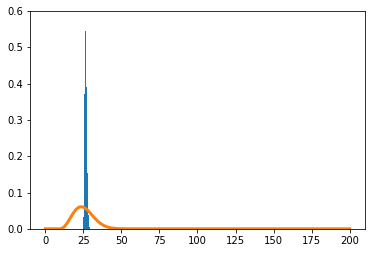

In [300]:
import scipy.stats as stats

maxwell = stats.maxwell
data = maxwell.rvs(loc=25, scale=1, size=10000)

params = maxwell.fit(data, floc=10)
print(params)
# (0, 4.9808603062591041)

plt.hist(data, bins=20, normed=True)
x = np.linspace(0, 200, 100)
plt.plot(x, maxwell.pdf(x, *params), lw=3)
plt.show()